#### Task#4
Fill all the necessary gaps in CNN_and_Transfer_Learning.ipynb and fit neural networks for solving the binary classification task: Dog or Cat on the image?
Data:
https://drive.google.com/drive/folders/1nzVk4GOvKR6P87uPszUkKMPtaXV_wrZf?usp=sharing

Part 1:
1. Build and fit CNN with 3 convolutional layers for binary classification
2. Evaluate accuracy on test data
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)

Part 2
1. Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application.
2. Do the same with one more available pre-trained deep learning model from keras application, for example Xception - https://keras.io/api/applications/
2. Evaluate accuracy on test data for p.1 and p.2
3. Plot the graphs for Loss(number_of_epochs) and Accuracy(number_of_epochs)
4. Check the performance of your model with the custom image of cat or dog (so the model will tell which class this image belongs to). Develop the function for the inference of the best algorithm.

Part 3*** Contest  (not obligatory)

Train your own classificator with the highest possible accuracy on the test data. You can use any architecture/preprocessing/postprocessing/ensembling approach you want.
One student who will achieve the best score will be awarded with 5A for the course (Exam) automatically!
NB: you can do the task using PyTorch framework  if it is more convenient for you


### Import libraries

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
IMG_SIZE = (224, 224)  
BATCH_SIZE = 32
EPOCHS_CNN = 15
EPOCHS_TL  = 5

print("GPU available:", len(tf.config.list_physical_devices("GPU")) > 0)

GPU available: False


### Import the dataset

In [8]:
DATA_DIR = "D:/Екатерина/Downloads/Cat_and_Dogs"

TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR   = os.path.join(DATA_DIR, "val")
TEST_DIR  = os.path.join(DATA_DIR, "test")

print("Train:", TRAIN_DIR)
print("Val:  ", VAL_DIR)
print("Test: ", TEST_DIR)

Train: D:/Екатерина/Downloads/Cat_and_Dogs\train
Val:   D:/Екатерина/Downloads/Cat_and_Dogs\val
Test:  D:/Екатерина/Downloads/Cat_and_Dogs\test


## Prepare the data.

In [9]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.2,
    rotation_range=15
)

val_test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

val_gen = val_test_datagen.flow_from_directory(
    VAL_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary"
)

test_gen = val_test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode="binary",
    shuffle=False
)

print("Class indices:", train_gen.class_indices)

Found 20000 images belonging to 2 classes.
Found 2490 images belonging to 2 classes.
Found 2500 images belonging to 2 classes.
Class indices: {'cats': 0, 'dogs': 1}


In [10]:
nb_train_samples = train_gen.samples
nb_validation_samples = val_gen.samples
nb_test_samples = test_gen.samples

print("Train samples:", nb_train_samples)
print("Validation samples:", nb_validation_samples)
print("Test samples:", nb_test_samples)

Train samples: 20000
Validation samples: 2490
Test samples: 2500


In [11]:
def plot_history(history, title):
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(history.history["loss"], label="Train")
    plt.plot(history.history["val_loss"], label="Val")
    plt.title(f"{title} - Loss")
    plt.legend()
    plt.grid(True)

    plt.subplot(1,2,2)
    plt.plot(history.history["accuracy"], label="Train")
    plt.plot(history.history["val_accuracy"], label="Val")
    plt.title(f"{title} - Accuracy")
    plt.legend()
    plt.grid(True)

    plt.show()

### Build and fit CNN with 3 convolutional layers for binary classification

Set the network architecture by sequentially adding layers to it:
1. A convolutional layer with 16 neurons, filter size 3x3. Activation function - 'relu'
2. MaxPooling layer with filter size 2x2.
3. A convolutional layer with 32 neurons, filter size 3x3. Activation function - 'relu'
4. MaxPooling layer with filter size 2x2.
5. A convolutional layer with 64 neurons, filter size 3x3. Activation function - 'relu'
6. MaxPooling layer with filter size 2x2.
7. Operation model.add (Flatten ()), which makes a one-dimensional vector of the resulting feature maps.
8. A fully connected layer with 64 neurons. Activation function - 'relu'
9. Use model.add (Dropout (0.5)) which excludes the edge from the current layer in the computational graph with a 50% probability to avoid overfitting.
10. A fully connected layer with 1 neuron. Activation function - 'sigmoid', because binary classification model.

In [12]:
cnn_model = keras.Sequential([
    layers.Conv2D(16, (3, 3), activation="relu", input_shape=(*IMG_SIZE, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(32, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

cnn_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

cnn_model.summary()

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,768,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,792,609 (10.65 MB)

 Trainable params: 2,792,609 (10.65 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#train CNN + check loss and accuracy + plots
history_cnn = cnn_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_CNN
)

cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_gen)
print(f"Test accuracy (CNN): {cnn_test_acc:.4f}")

plot_history(history_cnn, "Custom CNN")

Epoch 1/15
413/625 ━━━━━━━━━━━━━━━━━━━━ 4:05 1s/step - accuracy: 0.5691 - loss: 0.6781

#### Let's test different numbers of epochs for CNN model

In [1]:
def build_cnn():
    model = keras.Sequential([
        layers.Conv2D(16, (3, 3), activation="relu", input_shape=(*IMG_SIZE, 3)),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(32, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation="relu"),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dense(64, activation="relu"),
        layers.Dropout(0.5),
        layers.Dense(1, activation="sigmoid")
    ])

    model.compile(
        optimizer="adam",
        loss="binary_crossentropy",
        metrics=["accuracy"]
    )
    return model


Training with 10 epochs

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 263s 417ms/step - accuracy: 0.5157 - loss: 0.7287 - val_accuracy: 0.6039 - val_loss: 0.6729
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 227s 363ms/step - accuracy: 0.6054 - loss: 0.6650 - val_accuracy: 0.7041 - val_loss: 0.5735
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 232s 372ms/step - accuracy: 0.6814 - loss: 0.6019 - val_accuracy: 0.7427 - val_loss: 0.5362
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 230s 368ms/step - accuracy: 0.7301 - loss: 0.5504 - val_accuracy: 0.7630 - val_loss: 0.4823
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 231s 369ms/step - accuracy: 0.7567 - loss: 0.5104 - val_accuracy: 0.7849 - val_loss: 0.4498
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 238s 380ms/step - accuracy: 0.7748 - loss: 0.4888 - val_accuracy: 0.8145 - val_loss: 0.4206
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 241s 385ms/step - accuracy: 0.7889 - loss: 0.4742 - val_accuracy: 0.8198 - val_loss: 0.4162
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 228s 364ms

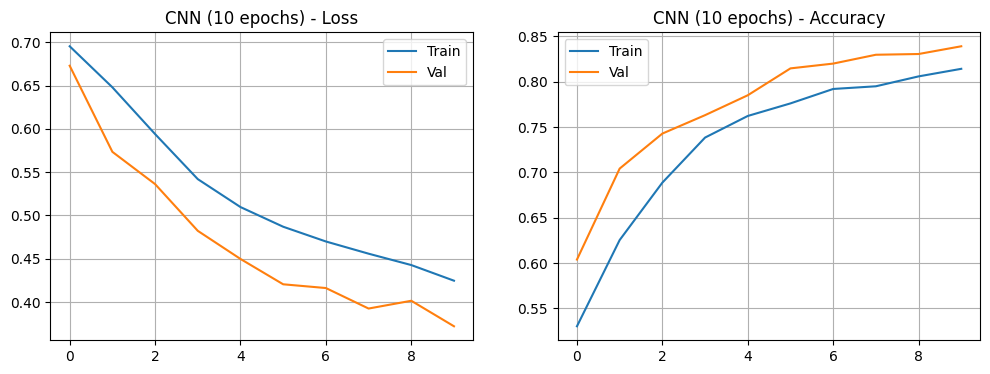


Training with 15 epochs

Epoch 1/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 240s 380ms/step - accuracy: 0.5702 - loss: 0.6801 - val_accuracy: 0.7325 - val_loss: 0.5339
Epoch 2/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 228s 365ms/step - accuracy: 0.7086 - loss: 0.5656 - val_accuracy: 0.7670 - val_loss: 0.5035
Epoch 3/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 225s 359ms/step - accuracy: 0.7390 - loss: 0.5257 - val_accuracy: 0.7881 - val_loss: 0.4607
Epoch 4/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 234s 374ms/step - accuracy: 0.7659 - loss: 0.4861 - val_accuracy: 0.8015 - val_loss: 0.4332
Epoch 5/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 234s 374ms/step - accuracy: 0.7910 - loss: 0.4574 - val_accuracy: 0.8186 - val_loss: 0.4159
Epoch 6/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 232s 372ms/step - accuracy: 0.8040 - loss: 0.4335 - val_accuracy: 0.8121 - val_loss: 0.4198
Epoch 7/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 238s 381ms/step - accuracy: 0.8050 - loss: 0.4300 - val_accuracy: 0.8206 - val_loss: 0.3952
Epoch 8/15
625/625 ━━━━━━━━━━━━━━━━━━━━ 247s 395ms

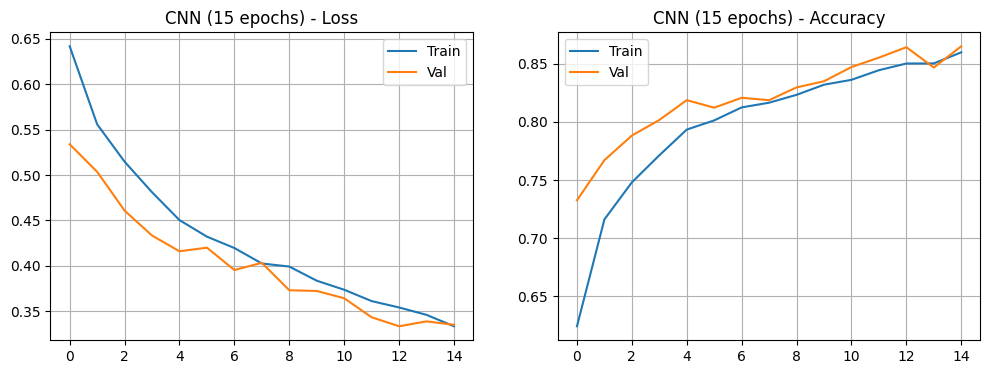


Training with 20 epochs

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 227s 359ms/step - accuracy: 0.5860 - loss: 0.6841 - val_accuracy: 0.6741 - val_loss: 0.5959
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 226s 362ms/step - accuracy: 0.7149 - loss: 0.5617 - val_accuracy: 0.7646 - val_loss: 0.4933
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 233s 373ms/step - accuracy: 0.7604 - loss: 0.4964 - val_accuracy: 0.7877 - val_loss: 0.4615
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 222s 354ms/step - accuracy: 0.7828 - loss: 0.4644 - val_accuracy: 0.8117 - val_loss: 0.4194
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 223s 357ms/step - accuracy: 0.7958 - loss: 0.4417 - val_accuracy: 0.8247 - val_loss: 0.3819
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 222s 355ms/step - accuracy: 0.8063 - loss: 0.4174 - val_accuracy: 0.8291 - val_loss: 0.3704
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 220s 352ms/step - accuracy: 0.8124 - loss: 0.4107 - val_accuracy: 0.8300 - val_loss: 0.3954
Epoch 8/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 220s 351ms

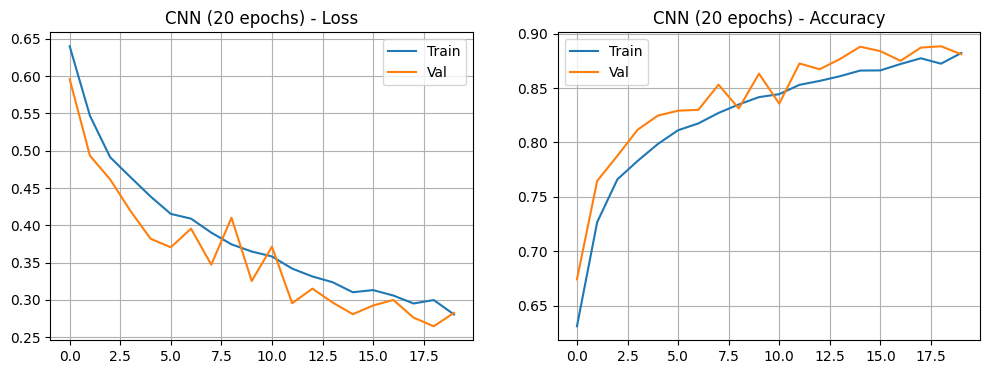

In [32]:
for EPOCHS in [10, 15, 20]:
    print(f"\nTraining with {EPOCHS} epochs\n")

    cnn_model = build_cnn()

    history = cnn_model.fit(
        train_gen,
        steps_per_epoch=nb_train_samples // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=val_gen,
        validation_steps=nb_validation_samples // BATCH_SIZE
    )

    scores = cnn_model.evaluate(
        test_gen,
        steps=nb_test_samples // BATCH_SIZE
    )

    print(f"Test accuracy after {EPOCHS} epochs: {scores[1]*100:.2f}%")
    plot_history(history, f"CNN ({EPOCHS} epochs)")

I will say that 15 epochs is the optimal number.

### Part 2 - Build and fit Transfer Learning model using pre-trained VGG16-model weights from keras application

In [15]:
# VGG16
base_vgg = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(*IMG_SIZE, 3)
)

base_vgg.trainable = False  # замораживаем веса

vgg_model = keras.Sequential([
    base_vgg,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

vgg_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

vgg_model.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 287s 436ms/step - accuracy: 0.7776 - loss: 0.4562 - val_accuracy: 0.9080 - val_loss: 0.2272
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 260s 416ms/step - accuracy: 0.8923 - loss: 0.2579 - val_accuracy: 0.9253 - val_loss: 0.1971
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 257s 411ms/step - accuracy: 0.8968 - loss: 0.2382 - val_accuracy: 0.9273 - val_loss: 0.1882
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 262s 418ms/step - accuracy: 0.9020 - loss: 0.2310 - val_accuracy: 0.9289 - val_loss: 0.1879
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 253s 404ms/step - accuracy: 0.9018 - loss: 0.2293 - val_accuracy: 0.9181 - val_loss: 0.1952
79/79 ━━━━━━━━━━━━━━━━━━━━ 17s 214ms/step - accuracy: 0.9461 - loss: 0.1381
Test accuracy (VGG16): 0.9092


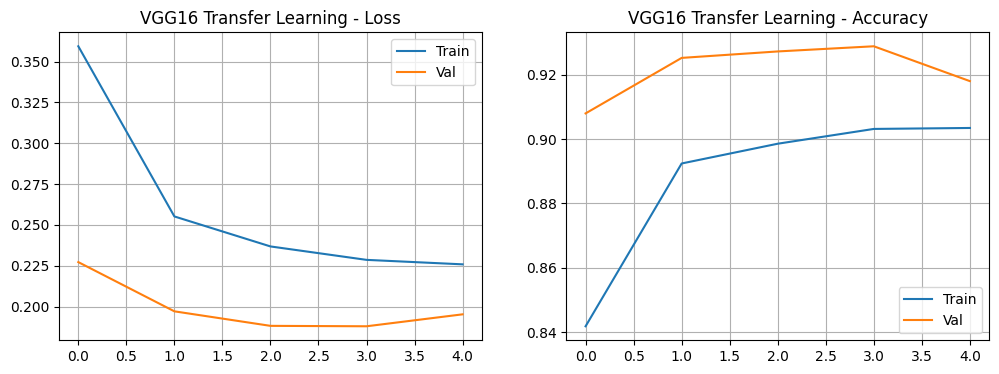

In [16]:
#train + check loss and accuracy + plots
history_vgg = vgg_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_TL
)

vgg_test_loss, vgg_test_acc = vgg_model.evaluate(test_gen)
print(f"Test accuracy (VGG16): {vgg_test_acc:.4f}")

plot_history(history_vgg, "VGG16 Transfer Learning")

In [17]:
# Xception
base_xcp = keras.applications.Xception(
    weights="imagenet",
    include_top=False,
    input_shape=(*IMG_SIZE, 3)
)

base_xcp.trainable = False

xcp_model = keras.Sequential([
    base_xcp,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

xcp_model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

xcp_model.summary()

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,123,881 (80.58 MB)

 Trainable params: 262,401 (1.00 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 272s 415ms/step - accuracy: 0.9650 - loss: 0.0897 - val_accuracy: 0.9867 - val_loss: 0.0353
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 250s 400ms/step - accuracy: 0.9829 - loss: 0.0473 - val_accuracy: 0.9876 - val_loss: 0.0356
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 252s 403ms/step - accuracy: 0.9825 - loss: 0.0501 - val_accuracy: 0.9859 - val_loss: 0.0361
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 249s 399ms/step - accuracy: 0.9833 - loss: 0.0425 - val_accuracy: 0.9859 - val_loss: 0.0370
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 249s 399ms/step - accuracy: 0.9844 - loss: 0.0392 - val_accuracy: 0.9888 - val_loss: 0.0343
79/79 ━━━━━━━━━━━━━━━━━━━━ 13s 168ms/step - accuracy: 0.9875 - loss: 0.0298
Test accuracy (Xception): 0.9860


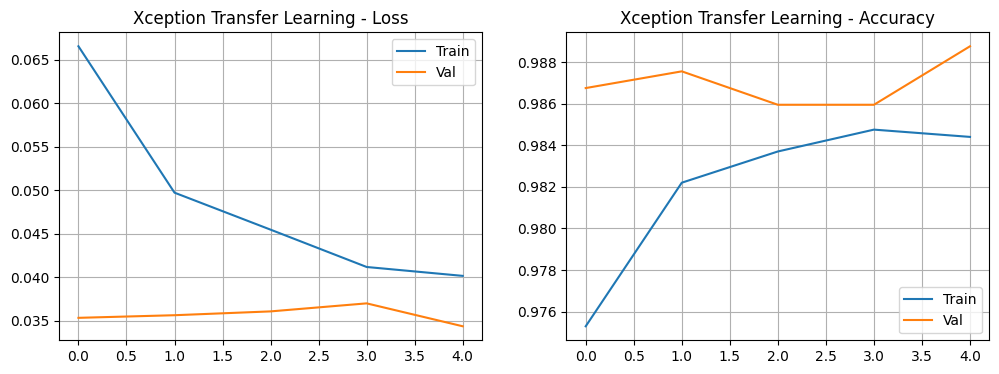

In [18]:
#train + check loss and accuracy + plots
history_xcp = xcp_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS_TL
)

xcp_test_loss, xcp_test_acc = xcp_model.evaluate(test_gen)
print(f"Test accuracy (Xception): {xcp_test_acc:.4f}")

plot_history(history_xcp, "Xception Transfer Learning")

#### Visualization of a picture + predicted class + probability

In [19]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess
from tensorflow.keras.applications.xception import preprocess_input as xcp_preprocess

In [21]:
config = {
    "cnn": {
        "preprocess": lambda x: x,          
        "class_names": ["Cat", "Dog"]
    },
    "vgg": {
        "preprocess": vgg_preprocess,
        "class_names": ["Cat", "Dog"]
    },
    "xception": {
        "preprocess": xcp_preprocess,
        "class_names": ["Cat", "Dog"]
    }
}

In [24]:
def predict_from_array(model, images, model_type, threshold=0.5):
    cfg = config[model_type]

    images = cfg["preprocess"](images.copy())
    probs = model.predict(images)
    labels = (probs > threshold).astype(int)

    return probs, labels

In [25]:
def visualize_predictions_from_generator(model,generator,model_type,model_name,n_images=8):
    images, true_labels = next(generator)

    probs, preds = predict_from_array(model, images, model_type)
    class_names = config[model_type]["class_names"]

    plt.figure(figsize=(16, 8))

    for i in range(n_images):
        plt.subplot(2, n_images // 2, i + 1)
        plt.imshow(images[i])
        plt.axis("off")

        true_class = class_names[int(true_labels[i])]
        pred_class = class_names[preds[i][0]]
        prob = probs[i][0]

        color = "green" if pred_class == true_class else "red"

        plt.title(
            f"True: {true_class}\nPred: {pred_class}\nProb: {prob:.2f}",
            color=color
        )

    plt.suptitle(f"{model_name} predictions on test images", fontsize=16)
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step


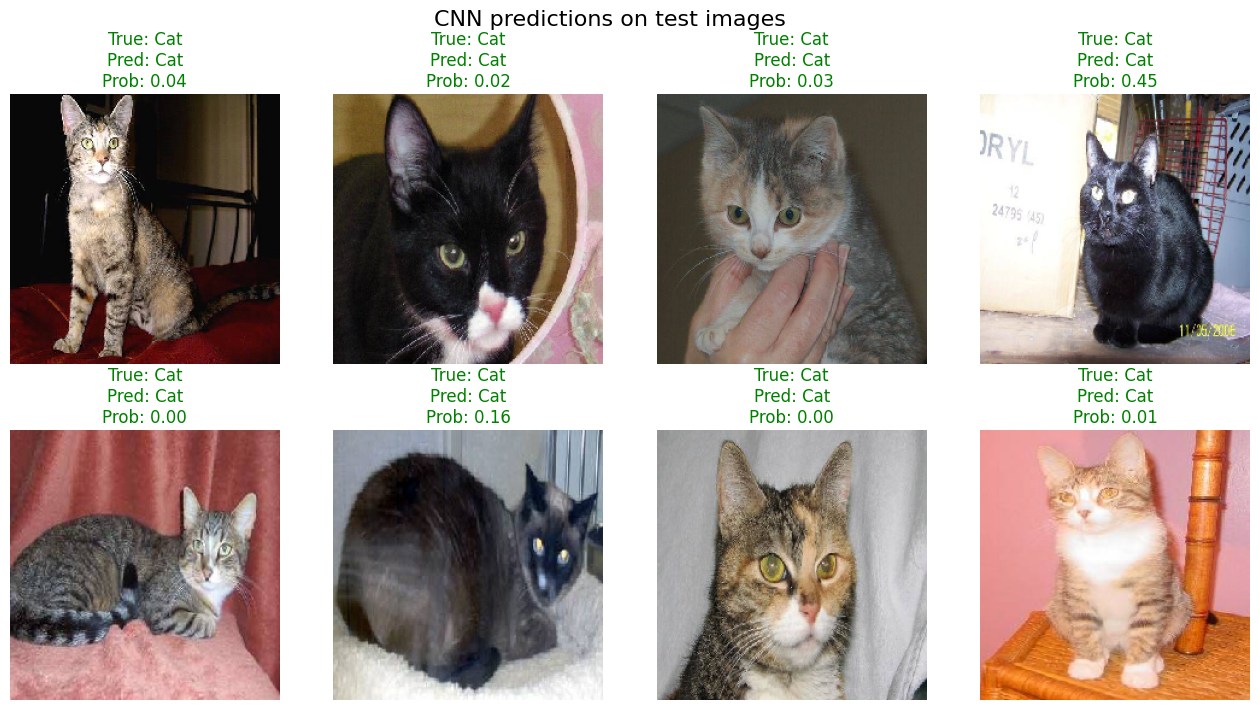

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step


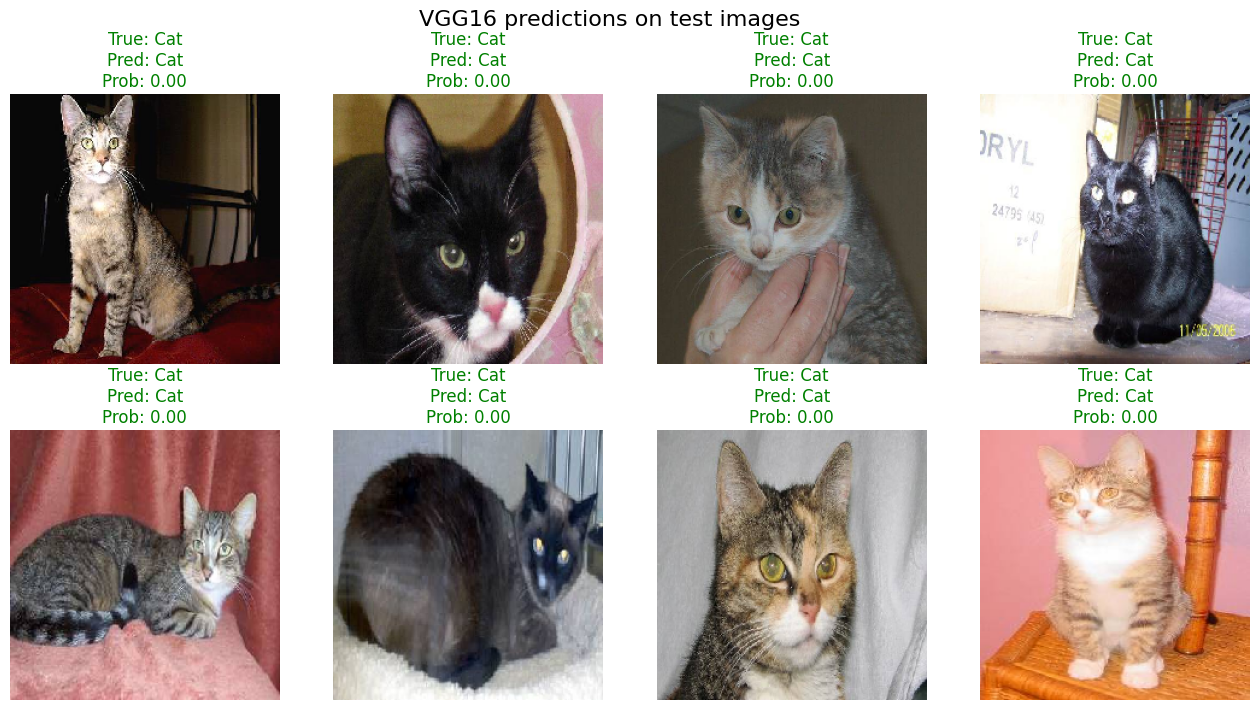

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


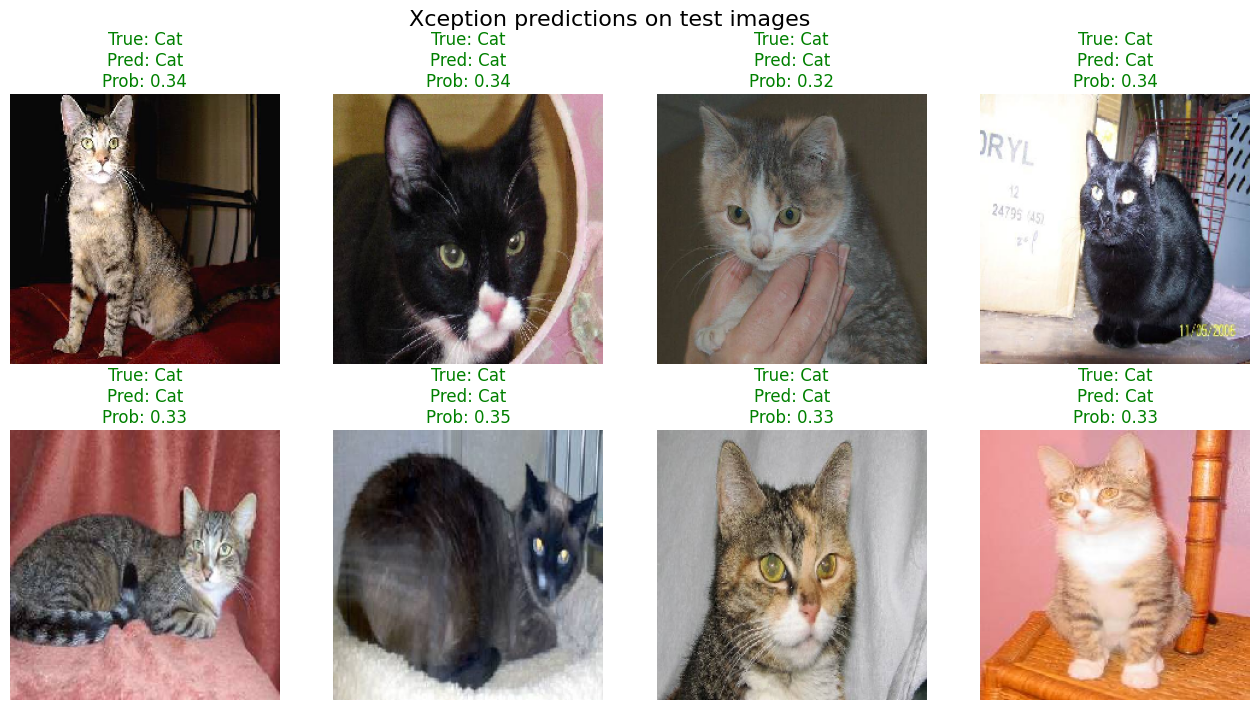

In [26]:
test_gen.reset()
visualize_predictions_from_generator(cnn_model, test_gen, "cnn", "CNN")

test_gen.reset()
visualize_predictions_from_generator(vgg_model, test_gen, "vgg", "VGG16")

test_gen.reset()
visualize_predictions_from_generator(xcp_model, test_gen, "xception", "Xception")

### Check the performance of your model with the custom image of cat or dog

In [32]:
from tensorflow.keras.preprocessing import image
def show_image(img_path):
    img = image.load_img(img_path)
    plt.figure(figsize=(4,4))
    plt.imshow(img)
    plt.axis("off")
    plt.title("Input image")
    plt.show()

def load_image_as_batch(img_path, img_size):
    img = image.load_img(img_path, target_size=img_size)
    x = image.img_to_array(img)
    return np.expand_dims(x, axis=0)

In [29]:
def predict_single_image(model, img_path, model_type):
    images = load_image_as_batch(img_path, IMG_SIZE)
    probs, preds = predict_from_array(model, images, model_type)

    class_names = config[model_type]["class_names"]
    label = class_names[preds[0][0]]

    return label, probs[0][0]

In [30]:
def compare_models_on_image(img_path):
    show_image(img_path)

    print("\nModel predictions:\n")

    for name, model, mtype in [
        ("CNN", cnn_model, "cnn"),
        ("VGG16", vgg_model, "vgg"),
        ("Xception", xcp_model, "xception")
    ]:
        label, prob = predict_single_image(model, img_path, mtype)
        print(f"{name:12s} → {label:3s} (probability = {prob:.4f})")

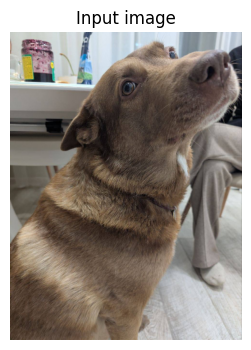


Model predictions:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
CNN          → Cat (probability = 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
VGG16        → Dog (probability = 1.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Xception     → Dog (probability = 0.9999)


In [35]:
compare_models_on_image("/kaggle/input/my-image1/my_image1.jpg")

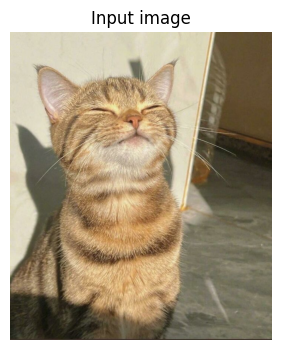


Model predictions:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
CNN          → Cat (probability = 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
VGG16        → Cat (probability = 0.0000)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Xception     → Cat (probability = 0.0000)


In [34]:
compare_models_on_image("/kaggle/input/my-image1/my_image2.jpg")

In [38]:
import pandas as pd

df = pd.DataFrame([
    ["CNN",  cnn_test_acc],
    ["VGG16",  vgg_test_acc],
    ["Xception",  xcp_test_acc]
], columns=["Model", "Test Accuracy"])

df

Model  Test Accuracy
0       CNN         0.8712
1     VGG16         0.9092
2  Xception         0.9860

### Conclusion
* Quantitative evaluation on the test set showed that the CNN achieved an accuracy of approximately 87%, while the VGG16 model reached about 91%. 
* The best performance was obtained with the Xception model, which achieved an accuracy close to 99%.
* Qualitative evaluation on custom images further demonstrated that the transfer learning models produced confident and correct predictions, whereas the CNN occasionally showed incorrect results.